## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

try:
    data = pd.read_csv('customers.csv')
    data.drop(['Channel', 'Region'], axis=1, inplace=True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

In [2]:
# Display a description of the dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [3]:
# Create a DataFrame of 3 random samples from the dataset
samples = data.sample(n=3, random_state=1).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
samples

# indices of sample = [283, 369, 207]

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,25767,3613,2013,10303,314,1384
1,6211,337,683,1089,41,296
2,2541,4737,6089,2946,5316,120


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others.

**Answer:**

Customer at index 0 spends a lot (when compared to the mean amount) on *Fresh and Frozen*. While on other categories, his/her spending is not so high. Seems the customer[0] might represent, sort of a **General Store**.

Using a similar analogy, Customer[1] seems to represent a **small scale restaurant**.

Customer[2] looks like he/she represents a **Cafe** (the values for *Milk and Grocery* is pretty high).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [4]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1)
target = data['Detergents_Paper']

# Split the data into training and testing sets using the given feature as the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, random_state=1)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print('Score:', score)

Score: 0.815241279195


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*

**Answer:**

Feature chosen: **Detergents_Paper**

Prediction score: **0.815**

This feature **does not seem to be necessary** for identifying customers' habits, because looking at the *prediction score*, I think other features could correctly predict the value of *Detergents_Paper* for more than 80% of the customers. It seems that this feature is kind of redundant.

(Also, I did this for all the features, turns out - *Detergents_Paper* got the **highest** prediction score).

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

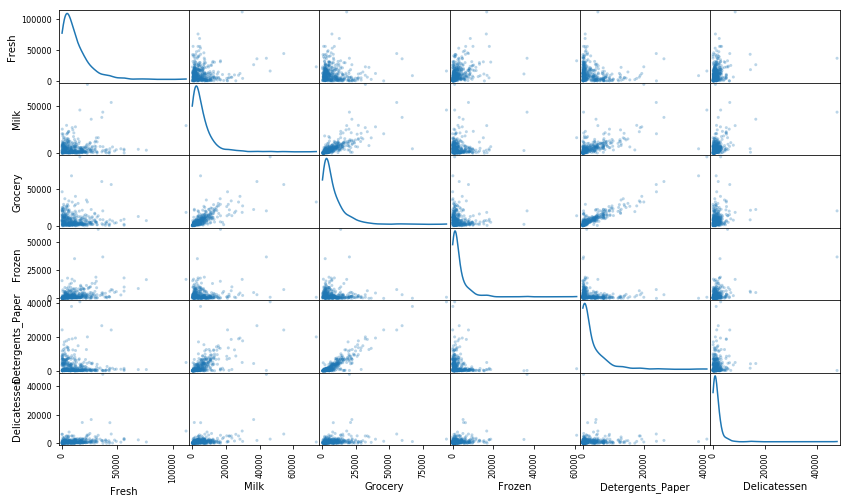

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  

** Answer: **

The data is **Not Normally distributed**. Most of the points are clustered in the lower region of x-axis.

**Grocery and Milk**, both show some correlation with *Detergents_Paper*. This confirms that *Detergents_Paper* is probably not a relevant feature for identifying customers' spending habits.

The data for *Grocery vs. Detergents_Paper* and *Milk vs. Detergents_Paper* appears to be **increasing in a liner fasion**.

## Data Preprocessing
Preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

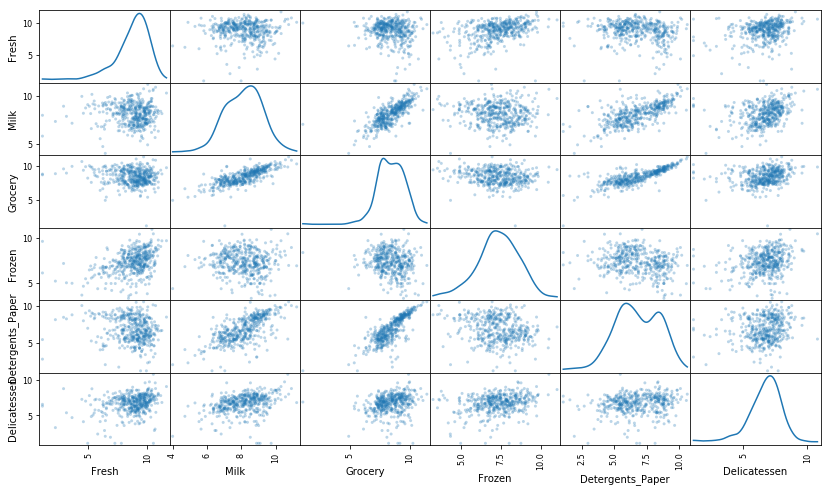

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

In [7]:
# Display the log-transformed sample data
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.156850,8.192294,7.607381,9.240190,5.749393,7.232733
1,8.734077,5.820083,6.526495,6.993015,3.713572,5.690359
2,7.840313,8.463159,8.714239,7.988204,8.578476,4.787492


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.


**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, q=25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, q=75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    print()
    
# Select the indices for data points you wish to remove
outliers  = [66, 75, 95, 338, 109, 128, 142, 187]


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918



Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen



Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437



Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215



Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918



Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Points at index *66, 75, 338* were considered as outliers for more than one feature. The should be removed, but I also removed some extra points based on the criteria below:

- These points were outliers even when I set the step as 2.5 times the interquartile range. (Extreme Outliers)
- Also, the features for which they were considered as outilers are those which gave a negative prediction score **(Fresh, Frozen and Delicatessen)**, indicating that these are very relevant features for identifying customers' spending habits.

## Feature Transformation
We will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

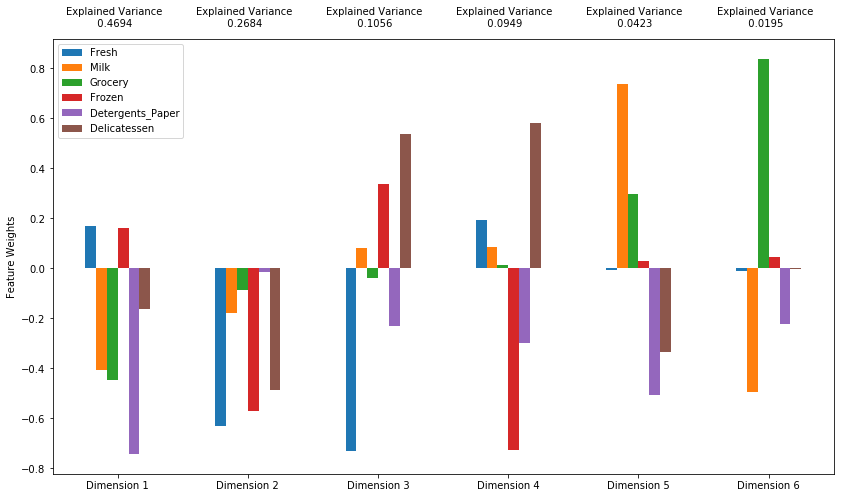

In [9]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=1)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

Variance explained by first and second principal component =  **0.7378**

Variance explained by first four components = **0.9383**

The first four dimensions best explain the customers' spending in the categories of **Fresh, Frozen and Delicatessen**.

*Fresh* has received the highest wieght by Dimension 1 (which explains the most variance in the data). Although, Dimension 2 and 3 assign a very negative weight to *Fresh*.

Similarly, *Frozen* has received a positive weight by Dimension 1 and 3, and a negative weight by Dimension 2 and 4.

*Delicatessen* has received a negative weight by the first and the second principal component, and a positive weight by the other 2 components.

### Observation
How the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.6037,-2.1427,0.2085,-0.5384,0.2163,-0.4286
1,4.2094,1.3346,-0.0096,0.3147,-0.3606,0.2066
2,-1.3040,1.0383,-0.5071,-2.2994,0.1142,-0.2947


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [11]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=1)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
How the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.6037,-2.1427
1,4.2094,1.3346
2,-1.3040,1.0383


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

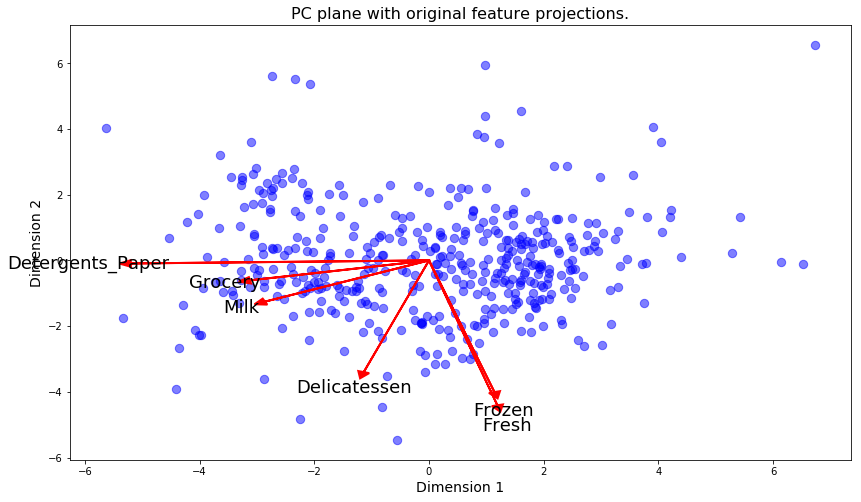

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Observed results

**Yes**, these observations do agree with the `pca_results`. For example, it looks like `Fresh` contributed a lot to Dimension one than that to Dimension 2, which is what we got to know from `pca-results`.

## Clustering

Choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means**

K-means starts by assuming that a data point belongs to one cluster. In the next iteration, we may revise the assignments of data points to clusters, in order to minimize the Euclidean distance between the points of a cluster and that cluster's centroid. *The point to note is - at any given time, for any point, we are certain that it belongs to which cluster*. This is known as *Hard Assignment*.

*Advantages:*

1. Computationally faster
2. Easy to implement; Simple to interpret
3. Works well for high dimensional data

*Disadvantages:*

1. Often produces clusters with uniform size
2. Sensitive to initial position of clusters, i.e., *Hard Assignment* might lead to mis-grouping
3. Assumes clusters are spherical. So, it does not work efficiently with data having complex geometrical shape (non-linear)

**Gaussian Mixture**

It is based on *EM (Expectation Maximization)*. Using a Gaussian Mixture Model, it is possible for a point to belong to more than one clusters at the same time (say there's a 70% chance of the point to belong to cluster 'A' and 30% chance to belong to cluster 'B'). This is known as *Soft Assignment*. The model starts with some prior belief about how certain we are about each point's cluster assignment. Then, iterativlely, it revises those beliefs.

*Advantages:*

1. More flexible
2. Works well with non-linear data (having complex geometry), by not putting a restriction on the shape of the clusters.

*Disadvantages:*

1. Does not work well with high-dimensional data.
2. Difficult to interpret.

**K-means OR Gaussian Mixture**

Practically, K-means is much more efficient (in terms of complexity) and simple. But, since -
- I have no idea about the structure of the given data (linear or non-linear)
- We have reduced the number of dimensions to 2

**Gaussian Mixture Model** seems like the more appropriate choice.

References - 

(https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

(https://stats.stackexchange.com/questions/207183/main-advantages-of-gaussian-process-models)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

no_of_components = range(2, 16)

for i in no_of_components:
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=i, n_init=5, random_state=1)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, random_state=1)

    print('Number of mixture components = {} --> Silhouette Score = {}'.format(i, score))

Number of mixture components = 2 --> Silhouette Score = 0.4243038977530715
Number of mixture components = 3 --> Silhouette Score = 0.3841526545626795
Number of mixture components = 4 --> Silhouette Score = 0.29752969604799795
Number of mixture components = 5 --> Silhouette Score = 0.2588656530571726
Number of mixture components = 6 --> Silhouette Score = 0.27087724574505395
Number of mixture components = 7 --> Silhouette Score = 0.316331981904533
Number of mixture components = 8 --> Silhouette Score = 0.29056627286927206
Number of mixture components = 9 --> Silhouette Score = 0.27253569748998613
Number of mixture components = 10 --> Silhouette Score = 0.32356818681346844
Number of mixture components = 11 --> Silhouette Score = 0.2891303315465003
Number of mixture components = 12 --> Silhouette Score = 0.29835328496050584
Number of mixture components = 13 --> Silhouette Score = 0.28261970190997215
Number of mixture components = 14 --> Silhouette Score = 0.3144229136123801
Number of mixt

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The output of the cell above shows the Silhouette Score for the number of mixture components in range 2 to 15 (both inclusive) in the Gaussian Mixture model.

The best score was obtained when **Number of mixture components was set to 2**. The score obtained was: **0.424**

### Cluster Visualization

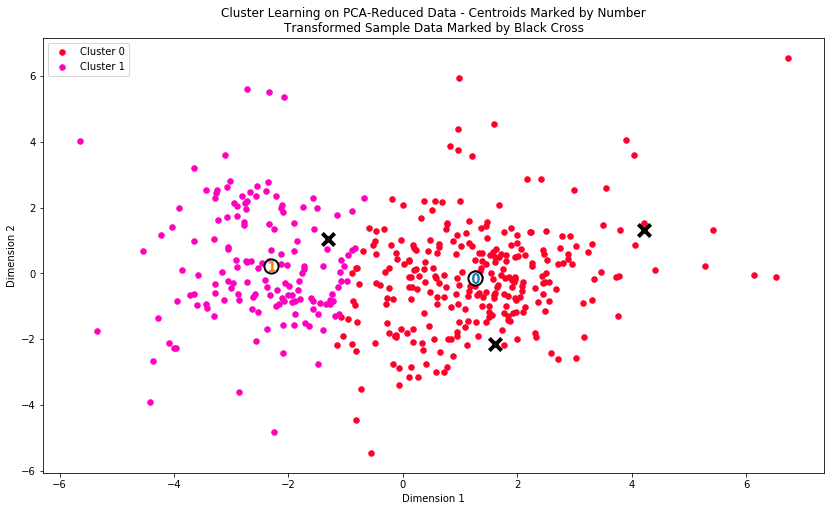

In [15]:
# Assigning the best value to n_components for visualization
clusterer = GaussianMixture(n_components=2, n_init=5, random_state=1)
clusterer.fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# Find the cluster centers
centers = clusterer.means_
# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=1)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [16]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8816.0,2061.0,2695.0,1964.0,359.0,723.0
Segment 1,3810.0,8275.0,12792.0,890.0,5034.0,1080.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*

**Answer:**

**Segment 0: Retailer/General Store** `->` Gievn its high spending on *Fresh and Frozen* categories and comparitively low spending on *Milk* and *Grocery*

**Segment 1: Restaurant/Cafe** `->` Given its high spending on *Milk, Grocery and Detergents_Paper*.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

In [18]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

**Yes**, the samples seems to have been predicted pretty accurately.

(In fact, the prediction is quite similar to what I anticipated way back in the beginning - *Question 1*)

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  

**Answer:**

We **should not** assume that the *change affects all customers equally*.

**Segment 0 (Retailers/General Stores)** are more likely to react in a positive way (or precicely, a *non-negative* way). This is because generally, retailers do not need to stock up on a *daily basis*. Obtaining their requirements 3 days a week would not make much difference in their line of work. Also, given that the wholesale distributer decided to deliver in the evening, this also does not seems to be a problem for the customers belonging to *Segment 0*.

**Segment 1 (Restaurants/Cafe)** are more likely to react to this change in a negative way. This is because, the restaurants serve their customers 7 days a week, from morning's breakfast to evening's dinner. They need fresh stock almost every day, and that too possibly not in the evening. Therefore, customers belonging to *Segment 1* will have a negative affect of the change.

In order to test this, the wholesale distributor should implement the change seperately on both the segments of customers.

*(Seems to me like 2 seperate A/B tests, one for each of his two customer segments)*

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  

**Answer:**

Given that the wholesale distributor now has tha customer segment data, describing which segment each customer belongs to, he could train a supervised learning model on this data. Now, since his ultimate goal would be to determine the most appropriate delivery service to a customer, he needs to classify that customer into one of the segments.

The target variable, for the classification model would therefore be the *`customer segment`. (the segment which was assigned to each customer)*.

Once the classification model has been trained, it could be used to predict the segment on new, unseen customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Observe how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

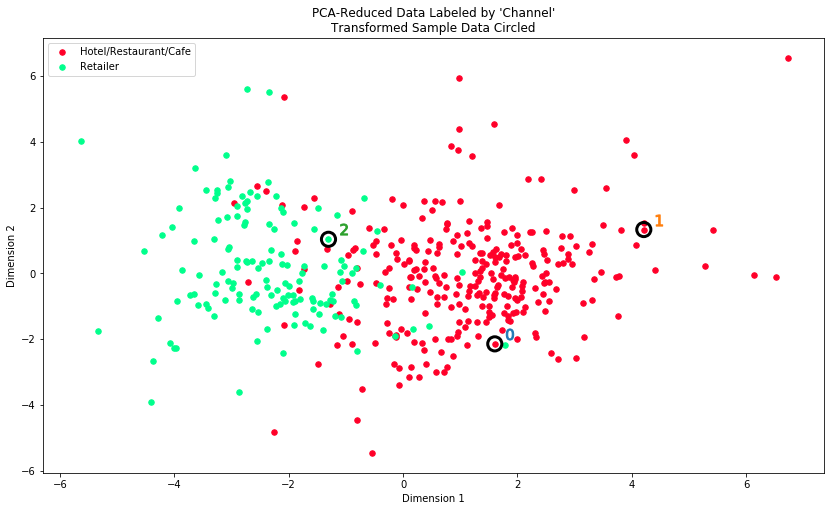

In [20]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Gaussian Mixture does a pretty good job. From the distribution, it looks like the model has captured a significant amount of detail so as to which segment a customer belongs. Although I would not call my model *perfect*. It captured the basic distribution, but some data points (for example red points within the cluster of green points) were not assigned the correct cluster by the model. But still, the Gaussian Mixture model explained the data pretty well.

We can see from the distribution that between the values `-2.5 to 1.0` (approx) on Dimension 1, there are customers belonging to both segments (Hotels/Restaurants and Retailers). But, beyond these values, the customers are classified purely either as 'Retailers' or 'Hotels/Restaurants/Cafes'

**Yes**, I think these classifications are consistent with the previous results I obtained. 